In [5]:
import joblib
from math import log, sqrt
import numpy as np
import pandas as pd
import datetime
M=57
%matplotlib inline
import matplotlib.pyplot as plt 
#plt.rcParams.update({'font.size': 2})    
from pylab import *

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

with open("spam.csv") as f:
    lis=[line.split() for line in f] 

l1=len(lis)
l2=len(lis[0])
for i in range(0,l1):
    for j in range(0,l2):
        lis[i][j]=float(lis[i][j])
        
df=pd.DataFrame(lis)

dtrain, dtest = train_test_split(df, test_size=0.3)    


In [6]:
#Inbuilt RandomForest
accuracy=np.zeros(M, dtype=float)
time=np.zeros(M, dtype=float)
ntest=len(dtest)
for m in range(1, M+1):
    clf = RandomForestClassifier(n_estimators=45, max_depth=None, max_features=m)
    st=datetime.datetime.now()
    clf.fit(dtrain.iloc[:,:-1], dtrain.iloc[:,-1])
    et=datetime.datetime.now()
    Y_p=clf.predict(dtest.iloc[:,:-1])
    cor=len(np.nonzero(Y_p==dtest.iloc[:,-1].values)[0])
    accuracy[m-1]=cor/(ntest*1.0)
    time[m-1]=(et-st).total_seconds()

In [8]:
import pickle
with open("stime15","wb") as fil:
    pickle.dump(time, fil)
with open("sacc15","wb") as fil:
    pickle.dump(accuracy, fil)    


In [7]:
#Loading time values of the implemented Random Forest code
time45=joblib.load("traintime45")
#Loading accuracies of the implemented Random Forest code
acc45=joblib.load("acc45")
#Loading OOB values of the implemented Random Forest code
oob=joblib.load("oob45")
#Test error with the implemented Random Forest code
te=joblib.load("acc45")
for i in range(0,15):
    te[i]=(100-te[i])/100.0 


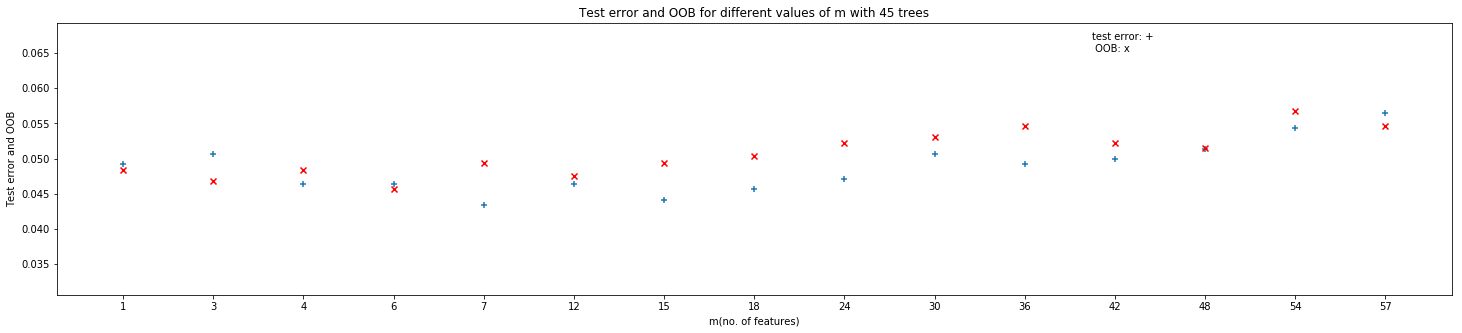

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 
#plt.rcParams.update({'font.size': 2})    
from pylab import *
rcParams['figure.figsize'] = 25,5

index = np.arange(15)
label=['1', '3', '4', '6', '7', '12', '15', '18', '24','30','36','42','48','54','57']
#x=[q for q in range(0, num_labels)]
plt.xticks(index, label)

figtext(.7, .8, "test error: +\n OOB: x", rotation='horizontal')

index = np.arange(0,15)
label=['1', '3', '4', '6', '7', '12', '15', '18', '24','30','36','42','48','54','57']
plt.xticks(index, label)

plt.xlabel('m(no. of features)')
plt.ylabel('Test error and OOB')
plt.title('Test error and OOB for different values of m with 45 trees')
plt.scatter([i for i in range(0, len(te))], te, marker='+')
plt.scatter([i for i in range(0, len(oob))], oob,color='red',marker='x')

plt.savefig('test-oob.jpg')

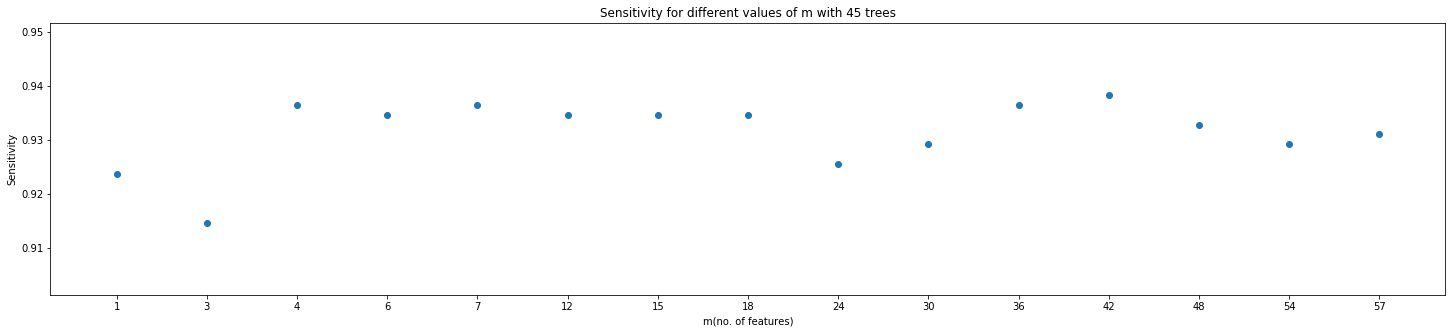

In [10]:
s=joblib.load("sen45")

%matplotlib inline
import matplotlib.pyplot as plt 
#plt.rcParams.update({'font.size': 2})    
from pylab import *
rcParams['figure.figsize'] = 25,5

index = np.arange(15)
label=['1', '3', '4', '6', '7', '12', '15', '18', '24','30','36','42','48','54','57']
#x=[q for q in range(0, num_labels)]
plt.xticks(index, label)

#figtext(.7, .8, "test error: +\n OOB: x", rotation='horizontal')

index = np.arange(0,15)
label=['1', '3', '4', '6', '7', '12', '15', '18', '24','30','36','42','48','54','57']
plt.xticks(index, label)

plt.xlabel('m(no. of features)')
plt.ylabel('Sensitivity')
plt.title('Sensitivity for different values of m with 45 trees')
plt.scatter([i for i in range(0, len(s))], s)

plt.savefig('sensitivity.jpg')